In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import sparse
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
import time
train = sparse.load_npz("train.npz")

# X = pd.DataFrame(train)
print(train.shape)

(14590, 77888)


In [58]:
%%time
truncated_svd = TruncatedSVD(n_components=1000,algorithm = 'arpack')
X = truncated_svd.fit_transform(train)

CPU times: total: 18min 28s
Wall time: 4min 52s


In [59]:
# X1 =np.copy(X)

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.57744376, -0.1401188 , -0.5667198 , ..., -0.12373455,
         2.76415188,  0.73130199],
       [-0.58664018,  0.01871128, -0.91780987, ...,  0.78683732,
         1.94307791, -1.09607541],
       [-0.76840913, -0.0970817 , -0.4790293 , ..., -0.20163253,
         1.40398737, -0.13652792],
       ...,
       [-0.36075099, -0.18031838, -1.38723118, ...,  0.58892675,
         0.72828245, -1.29816506],
       [-0.08876223,  0.36488069,  0.54404855, ...,  0.5829701 ,
         1.00287167, -0.34527422],
       [ 1.66173692,  0.4136936 , -1.3744049 , ...,  0.42479259,
        -0.15946032,  0.17352311]])

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X1)

array([[-0.57744376, -0.1401188 , -0.5667198 , ..., -0.12373455,
         2.76415188,  0.73130199],
       [-0.58664018,  0.01871128, -0.91780987, ...,  0.78683732,
         1.94307791, -1.09607541],
       [-0.76840913, -0.0970817 , -0.4790293 , ..., -0.20163253,
         1.40398737, -0.13652792],
       ...,
       [-0.36075099, -0.18031838, -1.38723118, ...,  0.58892675,
         0.72828245, -1.29816506],
       [-0.08876223,  0.36488069,  0.54404855, ...,  0.5829701 ,
         1.00287167, -0.34527422],
       [ 1.66173692,  0.4136936 , -1.3744049 , ...,  0.42479259,
        -0.15946032,  0.17352311]])

# Виузализируем до энкодеров

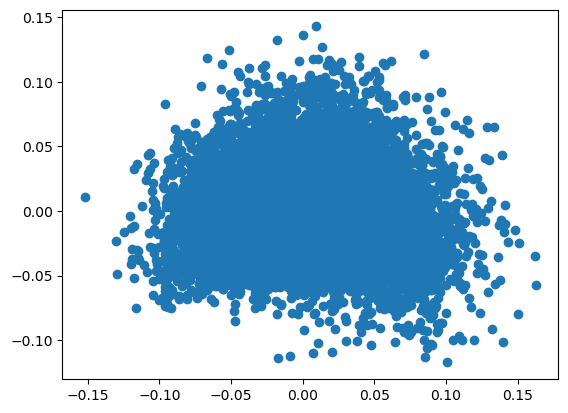

In [155]:
# plt.scatter(X_clean[:,1],X_clean[:,8])
# plt.show()


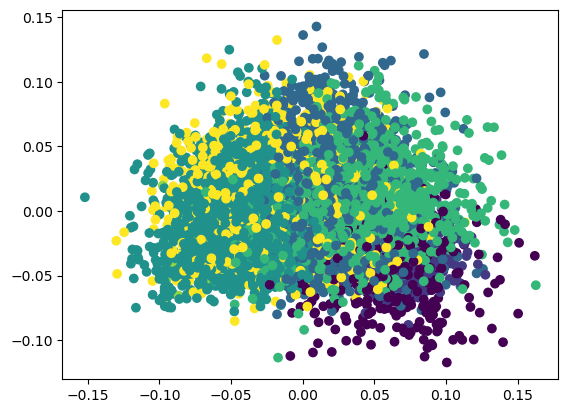

In [156]:
# plt.scatter(X_clean[:,1],X_clean[:,8],c = clusters1)

# Удаление шумов

In [62]:
pca = PCA(n_components=0.95)  # retain 95% of the variance
X_pca = pca.fit_transform(X1)

In [63]:
X_clean=X_pca

In [118]:
# iforest = IsolationForest(contamination=0.1, random_state=42)
# iforest.fit(X_pca)

# outlier_pred = iforest.predict(X_pca)
# # Remove noise from the dataset
# X_clean = X_pca[outlier_pred == 1]

# Агломеративный метод

In [200]:
# %%time
# from sklearn.cluster import AgglomerativeClustering
# hier_model = AgglomerativeClustering(n_clusters=7,metric="euclidean", linkage = 'single')
# cluster_labels = hier_model.fit_predict(X_clean)

CPU times: total: 3min 10s
Wall time: 3min 10s


In [201]:
# print(cluster_labels)

[0 0 0 ... 0 0 0]


In [202]:
# np.unique(hier_model.labels_, return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([14577,     2,     2,     2,     3,     2,     2], dtype=int64))

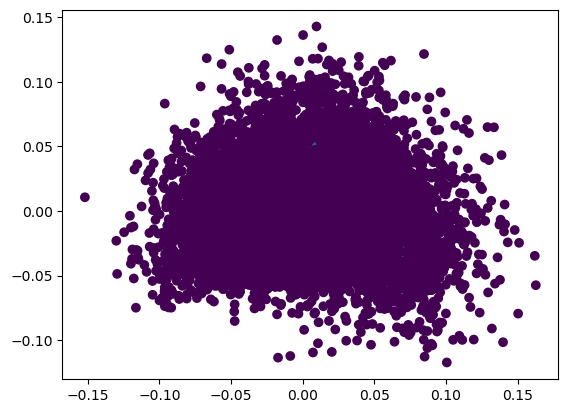

In [203]:
# plt.scatter(X_clean[:,1],X_clean[:,8],c = cluster_labels)

In [177]:
# df = pd.read_csv("sample_submission.csv")
# df.columns = ['ID','TARGET']

# df["TARGET"] = cluster_labels


# df[["ID", "TARGET"]].to_csv("ml_1.csv", index=False)







# Применение Kmeans

In [198]:
%%time
ssd = []

for k in range(2,14):
    model = KMeans(n_clusters=k,n_init =2)BIR
    model.fit(X_clean)
    
    ssd.append(model.inertia_)

CPU times: total: 4min 10s
Wall time: 48.9 s


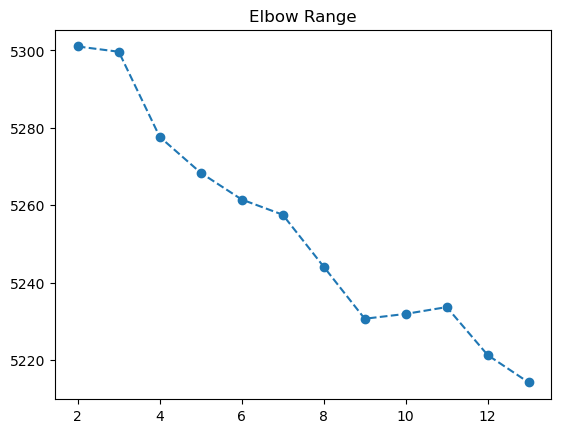

In [199]:
plt.plot(range(2,14),ssd,"o--")
plt.title("Elbow Range")
plt.show()

In [224]:
%%time
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=7, random_state=42, n_init = 10)
kmeans1.fit(X_clean)
clusters1 = kmeans1.predict(X_clean)

CPU times: total: 1min 55s
Wall time: 22 s


In [225]:
np.unique(kmeans1.labels_, return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6]),
 array([ 394, 7476, 1383,   43, 2720, 1872,  702], dtype=int64))

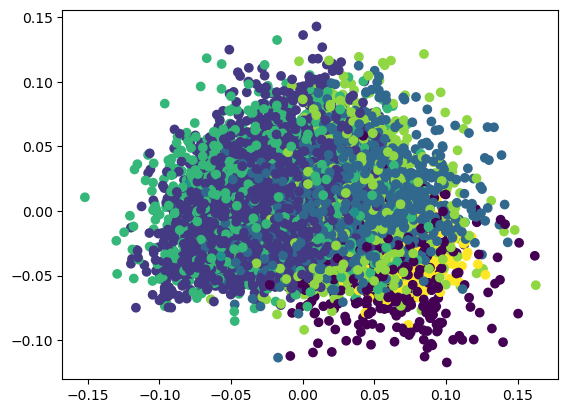

In [226]:
plt.scatter(X_clean[:,1],X_clean[:,8],c = clusters1)

# Выгрузка решения

In [195]:
df = pd.read_csv("sample_submission.csv")
df.columns = ['ID','TARGET']

df["TARGET"] = kmeans1.predict(X_clean)


df[["ID", "TARGET"]].to_csv("ml_1.csv", index=False)







### HDBSCAN

In [44]:
# %%time
# import hdbscan

# clusterer = hdbscan.HDBSCAN(min_samples = 5 ,min_cluster_size= 350, cluster_selection_epsilon = 0.2, max_cluster_size = 6000 )
# cluster_labels = clusterer.fit_predict(X)

CPU times: total: 10min 39s
Wall time: 10min 40s


In [45]:
# np.unique(clusterer.labels_, return_counts=True)

(array([-1], dtype=int64), array([14590], dtype=int64))

### DBSCAN

In [61]:
# %%time
# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps=0.05, min_samples=2)
# cluster_labels = dbscan.fit_predict(X)

CPU times: total: 52.3 s
Wall time: 10 s


In [62]:
# np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18], dtype=int64),
 array([14551,     2,     2,     2,     2,     2,     2,     2,     2,
            2,     2,     2,     2,     2,     2,     3,     2,     2,
            2,     2], dtype=int64))

## Визуализация по двум признакам

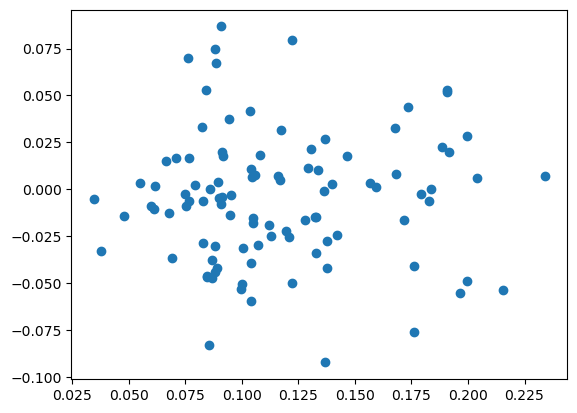

In [60]:
# plt.scatter(X[0:100,0],X[0:100,7])
# plt.show()

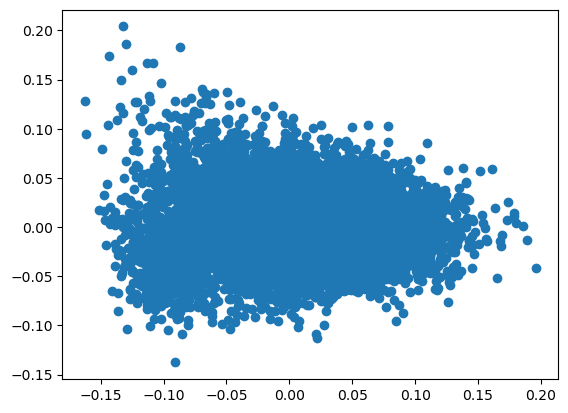

In [68]:
# plt.scatter(X[:,1],X[:,8])
# plt.show()

# # по  x удалим все что больше 0.13 и меньше -0.14
# # по y удалим все что больше 0.12 и меньше -0.10

### Удалим шумовые точки

### MiniBatchKMeans

In [64]:
%%time
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters = 3, batch_size = 10000, random_state = 42, n_init = 1, reassignment_ratio = 0.001)
clusters = kmeans.fit_predict(X_clean)

CPU times: total: 5.56 s
Wall time: 1.44 s


### Получили лучший скор при 3 плотных кластерах [5829,3803,4958] ml_1(57)

In [65]:
np.unique(kmeans.labels_, return_counts=True)


(array([0, 1, 2]), array([5662, 2877, 6051], dtype=int64))

In [66]:
df = pd.read_csv("sample_submission.csv")
df.columns = ['ID','TARGET']

df["TARGET"] = kmeans.predict(X_clean)


df[["ID", "TARGET"]].to_csv("ml_1.csv", index=False)







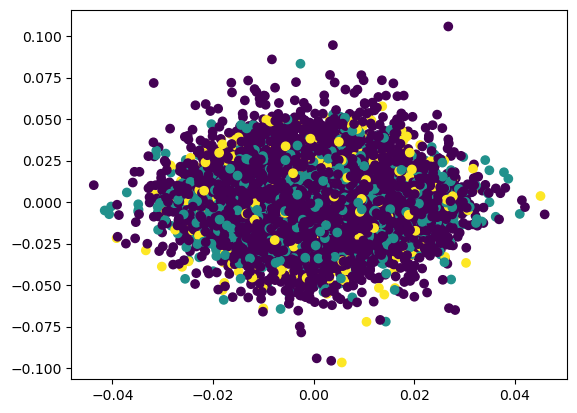

In [54]:
plt.scatter(X_clean[:,1825],X_clean[:,200],c = clusters)

### K-means

In [41]:
# from sklearn.cluster import KMeans
# kmeans1 = KMeans(n_clusters=6, random_state=0)
# clusters1 = kmeans1.fit_predict(X)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
# np.unique(kmeans1.labels_, return_counts=True)


(array([0, 1, 2, 3, 4, 5]),
 array([ 701, 4717, 1360, 4977, 2443,  392], dtype=int64))

### Визуализация после кластеризации по двум признакам

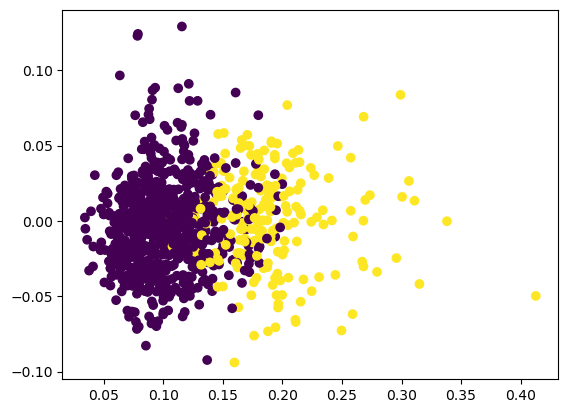

In [34]:
plt.scatter(X[0:1000,0],X[0:1000,7],c = clusters[0:1000])

### Выгрузка решения (модель выбирать самому)

In [40]:
# df = pd.read_csv("sample_submission.csv")
# df.columns = ['ID','TARGET']

# df["TARGET"] = kmeans1.predict(X)


# df[["ID", "TARGET"]].to_csv("ml_1.csv", index=False)







### GaussinMixture

In [18]:
%%time
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full',init_params = 'k-means++', n_init = 5)

# Get the cluster labels
labels = gmm.fit_predict(X)

CPU times: total: 21min 39s
Wall time: 4min 17s


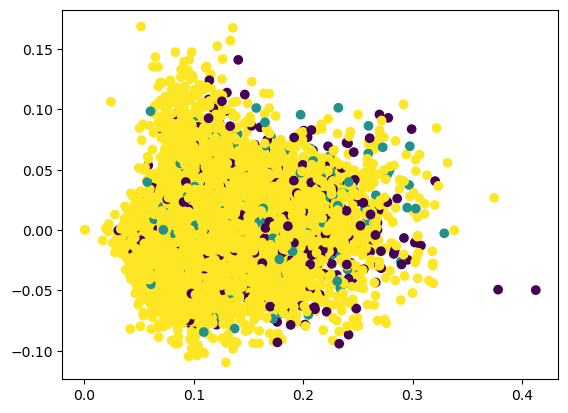

In [19]:
plt.scatter(X[:,0],X[:,7],c = labels)

In [21]:
np.unique(labels, return_counts=True)


(array([0, 1, 2], dtype=int64), array([  932,   623, 13035], dtype=int64))

# Bayess...


In [ ]:
# scaled_features = PowerTransformer().fit_transform(X_clean)
# df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

In [304]:
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture

bgmm = BayesianGaussianMixture(n_components=3, covariance_type='full', max_iter=100, n_init=5, random_state=1).fit(X_clean)
labels = bgmm.predict(X_clean)

In [305]:
np.unique(labels, return_counts = True)

(array([0, 1, 2], dtype=int64), array([  412,  3443, 10735], dtype=int64))

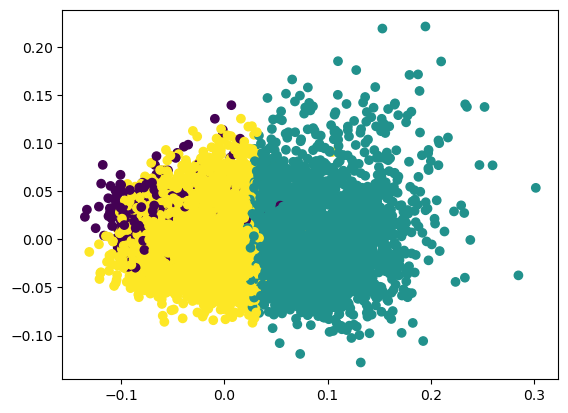

In [306]:
plt.scatter(X_clean[:,0],X_clean[:,7],c = labels)

In [307]:
df = pd.read_csv("sample_submission.csv")
df.columns = ['ID','TARGET']

df["TARGET"] = labels


df[["ID", "TARGET"]].to_csv("ml_1.csv", index=False)







### BIRCH

In [15]:
%%time
from sklearn.cluster import Birch

brc = Birch(n_clusters=3,branching_factor =30)
labels = brc.fit_predict(X_clean)

CPU times: total: 3min 2s
Wall time: 2min 2s


In [16]:
np.unique(labels,return_counts=True)

(array([0, 1, 2], dtype=int64), array([12520,  1871,   199], dtype=int64))

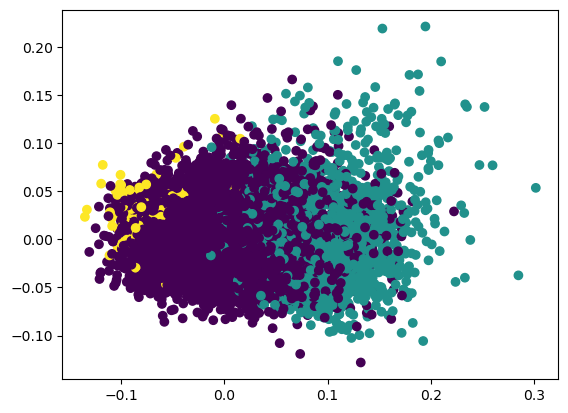

In [17]:
plt.scatter(X_clean[:,0],X_clean[:,7],c = labels)

In [14]:
df = pd.read_csv("sample_submission.csv")
df.columns = ['ID','TARGET']

df["TARGET"] = labels


df[["ID", "TARGET"]].to_csv("ml_1.csv", index=False)





